# Joining tables

In [3]:
library(tidyverse)


In [2]:
install.packages("dslabs")

package 'dslabs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpGcjZOX\downloaded_packages


In [4]:
library(dslabs)
data(murders)
head(murders)

Warning message:
"package 'dslabs' was built under R version 3.6.3"

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [5]:
data(polls_us_election_2016)
head(results_us_election_2016)

state,electoral_votes,clinton,trump,others
California,55,61.7,31.6,6.7
Texas,38,43.2,52.2,4.5
Florida,29,47.8,49.0,3.2
New York,29,59.0,36.5,4.5
Illinois,20,55.8,38.8,5.4
Pennsylvania,20,47.9,48.6,3.6


Just concatenating these two tables together will not work since the order of the states is not the same.

In [7]:
identical(results_us_election_2016$state, murders$state)

[1] FALSE

In [9]:
tab <- left_join(murders,results_us_election_2016,by ="state")%>%
select(-others)%>%
rename(cv = electoral_votes)

In [10]:
head(tab)

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6
Colorado,CO,West,5029196,65,9,48.2,43.3


In [11]:
tab

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6
Colorado,CO,West,5029196,65,9,48.2,43.3
Connecticut,CT,Northeast,3574097,97,7,54.6,40.9
Delaware,DE,South,897934,38,3,53.4,41.9
District of Columbia,DC,South,601723,99,3,90.9,4.1
Florida,FL,South,19687653,669,29,47.8,49.0


In [12]:
sum(is.na(tab))

[1] 0

In [13]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In practice, it is not always the case that each row in one table has a matching row in the other. For this reason, we have several versions of join. To illustrate this challenge, we will take subsets of the tables above. We create the tables tab1 and tab2 so that they have some states in common but not all:

In [16]:
tab_1 <- slice(murders,1:6)%>%
select(state,population)

In [17]:
tab_1

state,population
Alabama,4779736
Alaska,710231
Arizona,6392017
Arkansas,2915918
California,37253956
Colorado,5029196


In [19]:
tab_2 <- results_us_election_2016 %>%
filter(state%in%c("Alabama","Alaska","Arizona","Arkansas","California","Delaware"))%>%
select(state,electoral_votes) %>%
rename(ev = electoral_votes)

In [20]:
tab_2

state,ev
California,55
Arizona,11
Alabama,9
Arkansas,6
Alaska,3
Delaware,3


In [21]:
left_join(tab_1,tab_2,by="state")

state,population,ev
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,6
California,37253956,55
Colorado,5029196,NA


In [22]:
tab_1 %>%
left_join(tab_2,by="state")

state,population,ev
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,6
California,37253956,55
Colorado,5029196,NA


# Right join

In [23]:
tab_1 %>% right_join(tab_2,by="state")

state,population,ev
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,6
California,37253956,55
Delaware,NA,3


# Inner join

In [24]:
inner_join(tab_1,tab_2,by="state")

state,population,ev
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,6
California,37253956,55


# Full join

In [25]:
full_join(tab_1,tab_2,by="state")

state,population,ev
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,6
California,37253956,55
Colorado,5029196,NA
Delaware,NA,3


# Semi join

In [26]:
semi_join(tab_1,tab_2,by="state")

state,population
Alabama,4779736
Alaska,710231
Arizona,6392017
Arkansas,2915918
California,37253956


# Anti join

In [27]:
anti_join(tab_1,tab_2,by="state")

state,population
Colorado,5029196


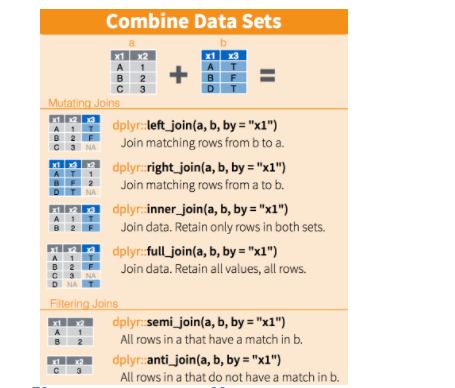

In [28]:
library("IRdisplay")
display_png(file='kjn.png',width = 700,height=200)

# Binding

 Unlike the join function, the binding functions do not try to match by a variable, but instead simply combine datasets. If the datasets don’t match by the appropriate dimensions, one obtains an error.

## Binding columns
The dplyr function bind_cols binds two objects by making them columns in a tibble. For example, we quickly want to make a data frame consisting of numbers we can use

In [29]:
bind_cols(a = 1:3, b= 4:6)

a,b
1,4
2,5
3,6


Note that there is an R-base function cbind with the exact same functionality. An important difference is that cbind can create different types of objects, while bind_cols always produces a data frame.

bind_cols can also bind two different data frames. For example, here we break up the tab data frame and then bind them back together:

In [31]:
tab_1 <- tab[,1:3]
tab_2 <- tab[,4:6]
tab_3 <- tab[,7:8]

In [32]:
new_tab <- bind_cols(tab_1,tab_2,tab_3)
head(new_tab)

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6
Colorado,CO,West,5029196,65,9,48.2,43.3


In [33]:
tab

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6
Colorado,CO,West,5029196,65,9,48.2,43.3
Connecticut,CT,Northeast,3574097,97,7,54.6,40.9
Delaware,DE,South,897934,38,3,53.4,41.9
District of Columbia,DC,South,601723,99,3,90.9,4.1
Florida,FL,South,19687653,669,29,47.8,49.0


# Binding by rows
The bind_rows function is similar to bind_cols, but binds rows instead of columns:

In [34]:
tab_1 <- tab[1:2,]
tab_2 <- tab[3:4,]

In [35]:
bind_rows(tab_1,tab_2)

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6


# Set operators

Another set of commands useful for combining datasets are the set operators. When applied to vectors, these behave as their names suggest. Examples are intersect, union, setdiff, and setequal

## Intersect

In [36]:
intersect(1:10,6:15)

[1]  6  7  8  9 10

In [37]:
intersect(c("a","b","c","d"),c("b","c","d","e"))

[1] "b" "c" "d"

In [40]:
tab_1 <- tab[1:5,]
tab_2 <- tab[3:7,]

intersect(tab_1,tab_2)

state,abb,region,population,total,cv,clinton,trump
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6


# Union

In [41]:
union(1:10, 6:15)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [42]:
union(c("a","b","c"), c("b","c","d"))

[1] "a" "b" "c" "d"

In [43]:
tab_1 <- tab[1:5,]

In [44]:
tab_2 <- tab[3:7,]

In [45]:
union(tab_1,tab_2)

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3
Arizona,AZ,West,6392017,232,11,45.1,48.7
Arkansas,AR,South,2915918,93,6,33.7,60.6
California,CA,West,37253956,1257,55,61.7,31.6
Colorado,CO,West,5029196,65,9,48.2,43.3
Connecticut,CT,Northeast,3574097,97,7,54.6,40.9


## Setdiff
The set difference between a first and second argument can be obtained with setdiff. Unlike intersect and union, this function is not symmetric

In [46]:
setdiff(1:10, 6:15)

[1] 1 2 3 4 5

In [47]:
setdiff(6:15, 1:10)

[1] 11 12 13 14 15

In [50]:
tab_1 <- tab[1:5,]
tab_2 <- tab[3:7,]
dplyr::setdiff(tab_1, tab_2)

state,abb,region,population,total,cv,clinton,trump
Alabama,AL,South,4779736,135,9,34.4,62.1
Alaska,AK,West,710231,19,3,36.6,51.3


## Setequal
Finally, the function setequal tells us if two sets are the same, regardless of order.

In [51]:
setequal(1:5, 1:6)

[1] FALSE

In [52]:
setequal(1:5, 5:1)

[1] TRUE

In [53]:
setequal(tab_1, tab_2)

[1] FALSE

# Exercises

1. Install and load the Lahman library. This database includes data related to baseball teams. It includes summary statistics about how the players performed on offense and defense for several years. It also includes personal information about the players.

The Batting data frame contains the offensive statistics for all players for many years. You can see, for example, the top 10 hitters by running this code

In [55]:
install.packages("Lahman")

package 'Lahman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpGcjZOX\downloaded_packages


In [56]:
library(Lahman)

Warning message:
"package 'Lahman' was built under R version 3.6.3"

In [57]:
top <- Batting %>%
filter(yearID == 2016)%>%
arrange(desc(HR))%>%
slice(1:10)

In [58]:
top

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
trumbma01,2016,1,BAL,AL,159,613,94,157,27,...,108,2,0,51,170,1,3,0,0,14
cruzne02,2016,1,SEA,AL,155,589,96,169,27,...,105,2,0,62,159,5,9,0,7,15
daviskh01,2016,1,OAK,AL,150,555,85,137,24,...,102,1,2,42,166,0,8,0,5,19
doziebr01,2016,1,MIN,AL,155,615,104,165,35,...,99,18,2,61,138,6,8,2,5,12
encared01,2016,1,TOR,AL,160,601,99,158,34,...,127,2,0,87,138,3,5,0,8,22
arenano01,2016,1,COL,NL,160,618,116,182,35,...,133,2,3,68,103,10,2,0,8,17
cartech02,2016,1,MIL,NL,160,549,84,122,27,...,94,3,1,76,206,1,9,0,10,18
frazito01,2016,1,CHA,AL,158,590,89,133,21,...,98,15,5,64,163,1,4,1,7,11
bryankr01,2016,1,CHN,NL,155,603,121,176,35,...,102,8,5,75,154,5,18,0,3,3
canoro01,2016,1,SEA,AL,161,655,107,195,33,...,103,0,1,47,100,8,8,0,5,18


In [59]:
top %>% as_tibble()

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
trumbma01,2016,1,BAL,AL,159,613,94,157,27,...,108,2,0,51,170,1,3,0,0,14
cruzne02,2016,1,SEA,AL,155,589,96,169,27,...,105,2,0,62,159,5,9,0,7,15
daviskh01,2016,1,OAK,AL,150,555,85,137,24,...,102,1,2,42,166,0,8,0,5,19
doziebr01,2016,1,MIN,AL,155,615,104,165,35,...,99,18,2,61,138,6,8,2,5,12
encared01,2016,1,TOR,AL,160,601,99,158,34,...,127,2,0,87,138,3,5,0,8,22
arenano01,2016,1,COL,NL,160,618,116,182,35,...,133,2,3,68,103,10,2,0,8,17
cartech02,2016,1,MIL,NL,160,549,84,122,27,...,94,3,1,76,206,1,9,0,10,18
frazito01,2016,1,CHA,AL,158,590,89,133,21,...,98,15,5,64,163,1,4,1,7,11
bryankr01,2016,1,CHN,NL,155,603,121,176,35,...,102,8,5,75,154,5,18,0,3,3
canoro01,2016,1,SEA,AL,161,655,107,195,33,...,103,0,1,47,100,8,8,0,5,18


In [60]:
Master %>% as_tibble()

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,...,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
aaronha01,1934,2,5,USA,AL,Mobile,NA,NA,NA,...,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NA,1934-02-05
aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
aasedo01,1954,9,8,USA,CA,Orange,NA,NA,NA,...,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NA,1954-09-08
abadan01,1972,8,25,USA,FL,Palm Beach,NA,NA,NA,...,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01,NA,1972-08-25
abadfe01,1985,12,17,D.R.,La Romana,La Romana,NA,NA,NA,...,220,73,L,L,2010-07-28,2019-09-28,abadf001,abadfe01,NA,1985-12-17
abadijo01,1850,11,4,USA,PA,Philadelphia,1905,5,17,...,192,72,R,R,1875-04-26,1875-06-10,abadj101,abadijo01,1905-05-17,1850-11-04
abbated01,1877,4,15,USA,PA,Latrobe,1957,1,6,...,170,71,R,R,1897-09-04,1910-09-15,abbae101,abbated01,1957-01-06,1877-04-15
abbeybe01,1869,11,11,USA,VT,Essex,1962,6,11,...,175,71,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01,1962-06-11,1869-11-11
abbeych01,1866,10,14,USA,NE,Falls City,1926,4,27,...,169,68,L,L,1893-08-16,1897-08-19,abbec101,abbeych01,1926-04-27,1866-10-14


In [61]:
colnames(Master)

[1] "playerID"     "birthYear"    "birthMonth"   "birthDay"     "birthCountry"
 [6] "birthState"   "birthCity"    "deathYear"    "deathMonth"   "deathDay"    
[11] "deathCountry" "deathState"   "deathCity"    "nameFirst"    "nameLast"    
[16] "nameGiven"    "weight"       "height"       "bats"         "throws"      
[21] "debut"        "finalGame"    "retroID"      "bbrefID"      "deathDate"   
[26] "birthDate"

In [62]:
co2_wide <- data.frame(matrix(co2, ncol = 12, byrow = TRUE)) %>% 
  setNames(1:12) %>%
  mutate(year = 1959:1997) %>%
  gather(month, co2, -year, convert = TRUE)

In [63]:
co2_wide

year,month,co2
1959,1,315.42
1960,1,316.27
1961,1,316.73
1962,1,317.78
1963,1,318.58
1964,1,319.41
1965,1,319.27
1966,1,320.46
1967,1,322.17
1968,1,322.40
